<a href="https://colab.research.google.com/github/SowjanyaKiran/Time_series_sowanya/blob/main/Time_Series_PJME_Hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Loading the dataset
df=pd.read_csv('/content/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [60]:
# Setting the index and converting it to datetime format
df.set_index('Datetime', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


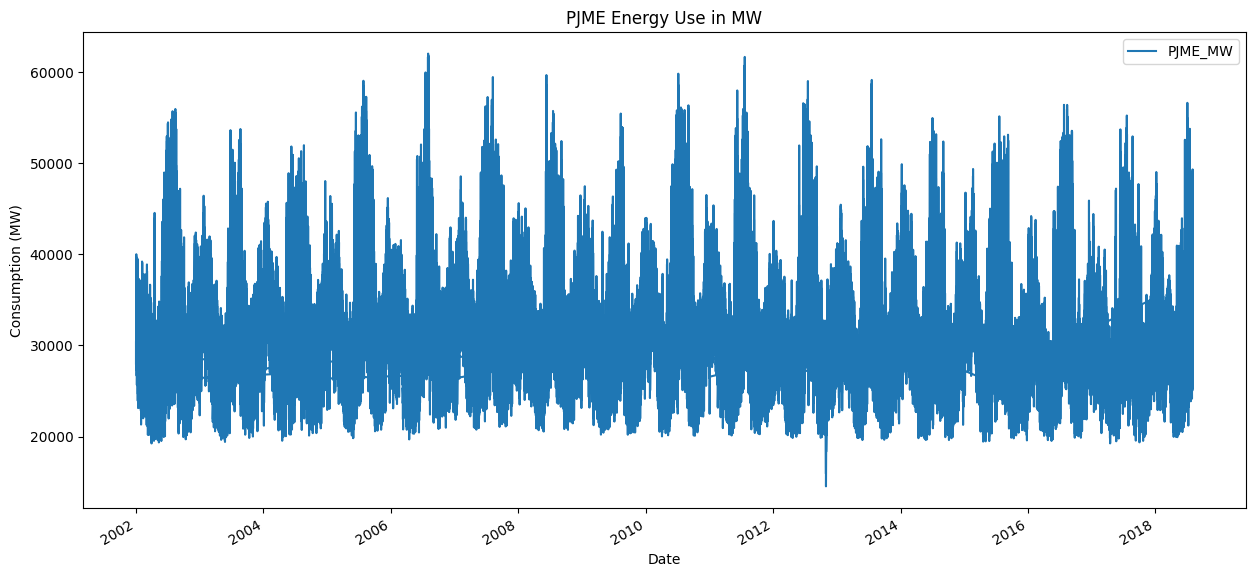

In [61]:
# Plot
df.plot(figsize = (15, 7), title = 'PJME Energy Use in MW')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

In [62]:
# Extracting some features
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x : x.week)
df = df.set_index('Datetime')
df['day'] = [x for x in df.index.day]
df['hour'] = [x for x in df.index.hour]
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]
df['day_of_week'] = [x.dayofweek for x in df.index]
df.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,31,1,Tue,2002_12,1
2002-12-31 02:00:00,25147.0,2002,12,1,31,2,Tue,2002_12,1
2002-12-31 03:00:00,24574.0,2002,12,1,31,3,Tue,2002_12,1
2002-12-31 04:00:00,24393.0,2002,12,1,31,4,Tue,2002_12,1
2002-12-31 05:00:00,24860.0,2002,12,1,31,5,Tue,2002_12,1


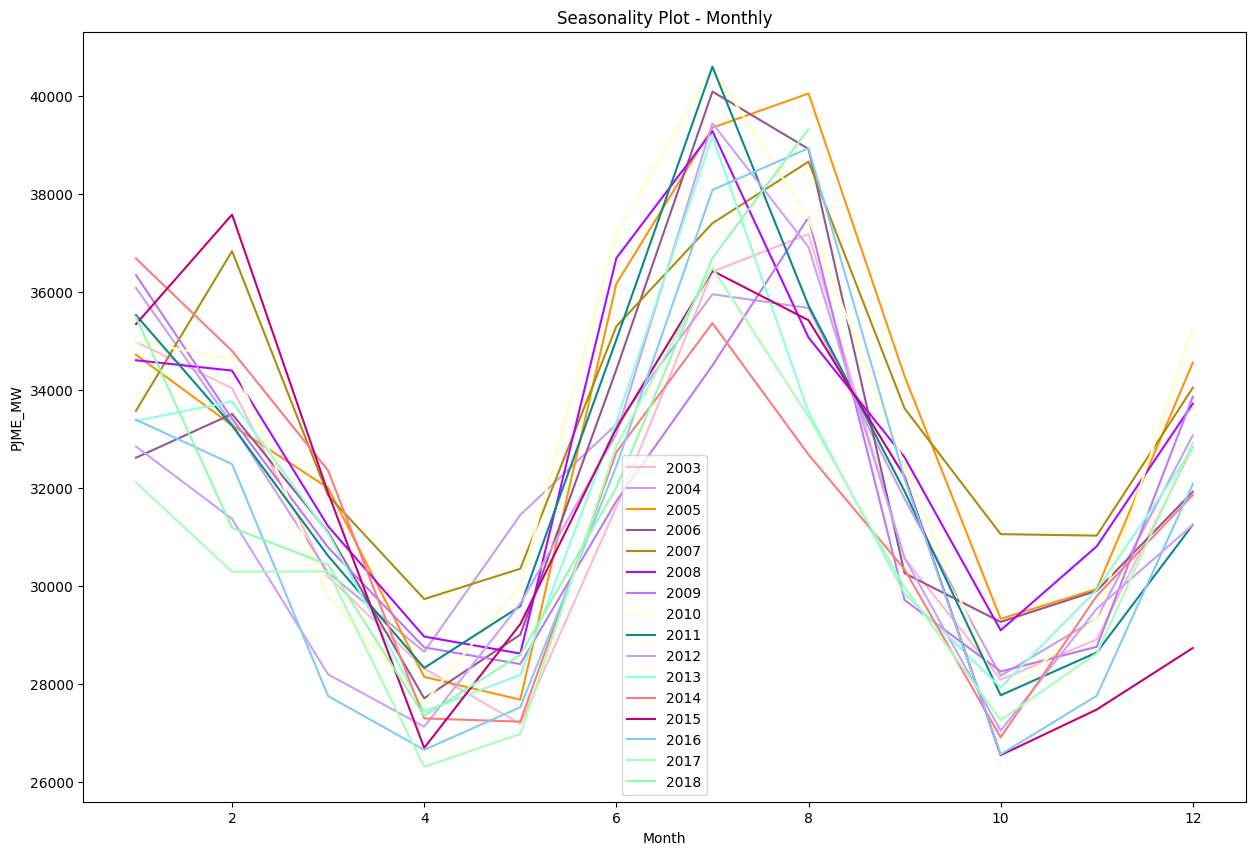

In [63]:
# Monthly Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(years), replace = False)

# Plot
plt.figure(figsize = (15, 10))
for i, y in enumerate(years):
  if i > 0:
    plt.plot('month', 'PJME_MW', data = df_plot[df_plot['year'] == y], color = colors[i], label = y)

# Setting the labels
plt.title('Seasonality Plot - Monthly')
plt.xlabel('Month')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

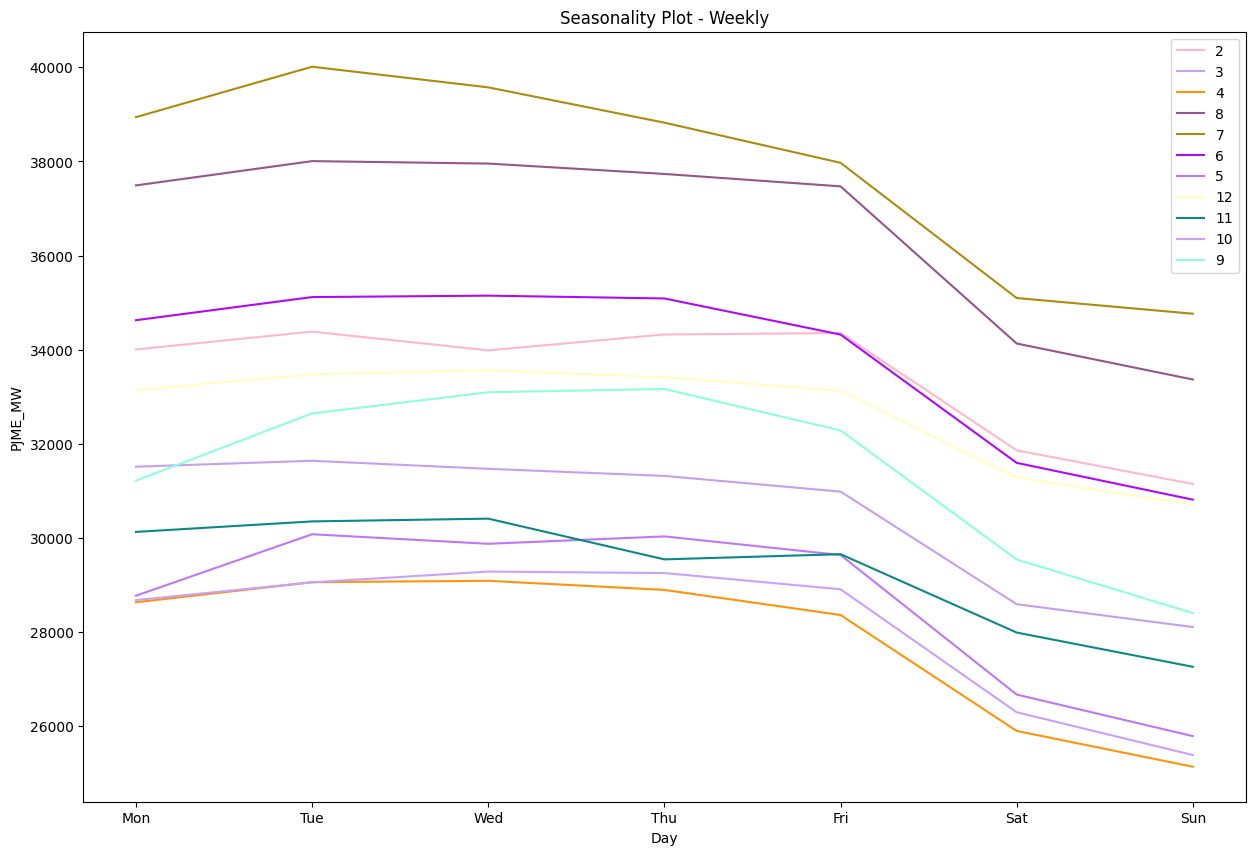

In [64]:
# Weekly Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['day_str', 'month', 'PJME_MW', 'day_of_week']].dropna().groupby(['day_str', 'month', 'day_of_week']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'day_of_week', ascending = True)
df_plot = df_plot.drop('day_of_week', axis = 1)
months = df_plot['month'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(months), replace = False)

# Plot
plt.figure(figsize = (15, 10))
for i, y in enumerate(months):
  if i > 0:
    plt.plot('day_str', 'PJME_MW', data = df_plot[df_plot['month'] == y], color = colors[i], label = y)

# Setting the labels
plt.title('Seasonality Plot - Weekly')
plt.xlabel('Day')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

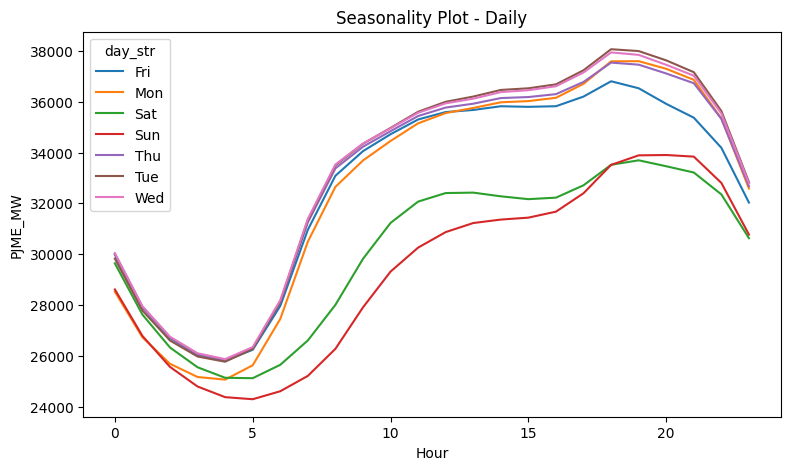

In [65]:
# Daily Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['hour', 'day_str', 'PJME_MW']].dropna().groupby(['hour', 'day_str']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'hour', ascending = True)

# Plot using Seaborn
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'hour', y = 'PJME_MW', hue = 'day_str', data = df_plot, legend = True)
plt.title('Seasonality Plot - Daily')
plt.xlabel('Hour')
plt.ylabel('PJME_MW')
plt.show()

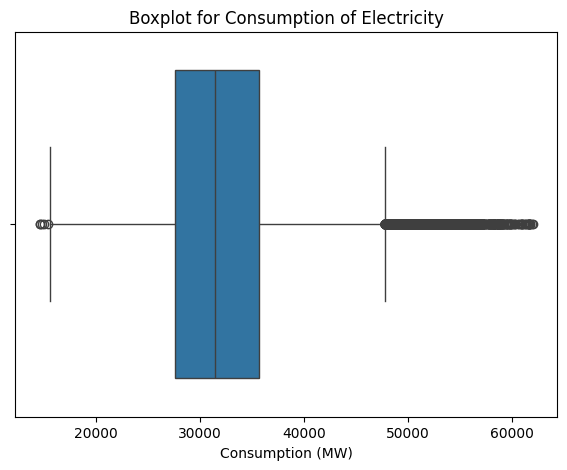

In [66]:
# Boxplot for outliers
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'PJME_MW', data = df)
plt.xlabel('Consumption (MW)')
plt.title(f'Boxplot for Consumption of Electricity')
plt.show()

In [67]:
# Creating features
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]
df.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,31,1,Tue,2002_12,1
2002-12-31 02:00:00,25147.0,2002,12,1,31,2,Tue,2002_12,1
2002-12-31 03:00:00,24574.0,2002,12,1,31,3,Tue,2002_12,1
2002-12-31 04:00:00,24393.0,2002,12,1,31,4,Tue,2002_12,1
2002-12-31 05:00:00,24860.0,2002,12,1,31,5,Tue,2002_12,1


In [68]:
# Filtering the data
df_plot = df[df['year'] >= 2017].reset_index().sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6


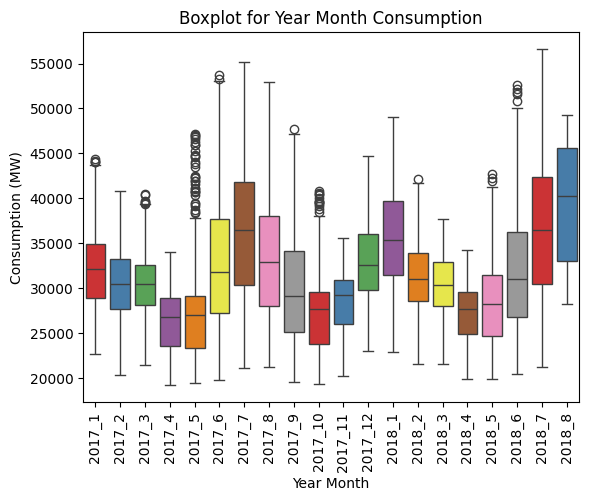

In [69]:
# Boxplot
sns.boxplot(x = 'year_month', y = 'PJME_MW', data = df_plot, palette = 'Set1')
plt.xlabel('Year Month')
plt.ylabel('Consumption (MW)')
plt.title('Boxplot for Year Month Consumption')
plt.xticks(rotation = 90)
plt.show()

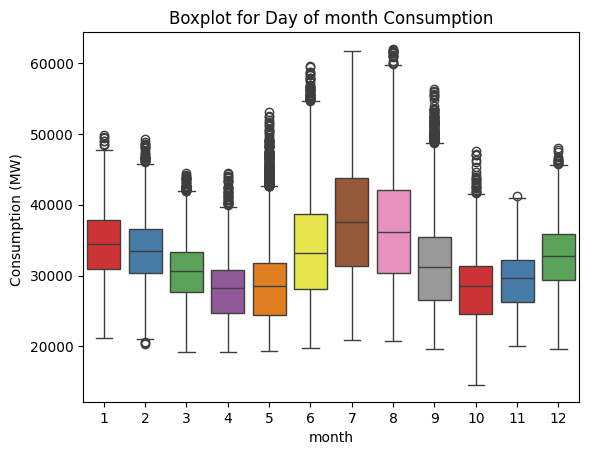

In [70]:
# Boxplot
df_plot = df[['month', 'PJME_MW']]. sort_values (by = 'month')
sns. boxplot(x = 'month', y = 'PJME_MW', data = df_plot, palette = 'Set1')
plt. title('Boxplot for Day of month Consumption')
plt. xlabel ('month')
plt.ylabel ('Consumption (MW) ')
plt. show( )

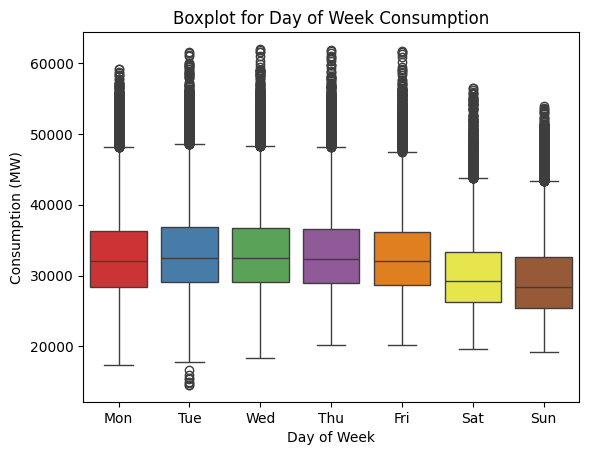

In [71]:
# Boxplot
df_plot = df[['day_str', 'day_of_week', 'PJME_MW']].sort_values(by = 'day_of_week')
sns.boxplot(x = 'day_str', y = 'PJME_MW', data = df_plot, palette = 'Set1')
plt.title('Boxplot for Day of Week Consumption')
plt.xlabel('Day of Week')
plt.ylabel('Consumption (MW)')
plt.show()

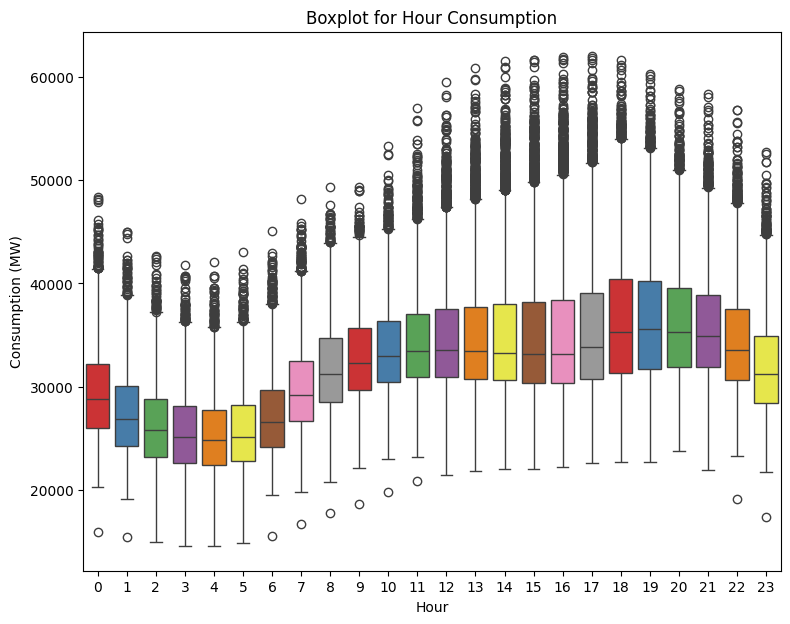

In [72]:
# Boxplot
df_plot = df[['hour', 'PJME_MW']].sort_values(by = 'hour')
plt.figure(figsize = (9, 7))
sns.boxplot(x = 'hour', y = 'PJME_MW', data = df_plot, palette = 'Set1')
plt.title('Boxplot for Hour Consumption')
plt.xlabel('Hour')
plt.ylabel('Consumption (MW)')
plt.show()

In [73]:
#Filtering the data
df_plt = df[df['year'] >= 2017 ].reset_index()
df_plt = df_plt.drop_duplicates(subset = ['Datetime']).sort_values(by = 'Datetime')
df_plt = df_plt.set_index('Datetime')
df_plt.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6


In [74]:
# Adding new columns
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot.head()

,hour,PJME_MW,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,
2010-09-17,0,28361.0,28361.0,28361.0
2002-12-31,0,28765.0,28765.0,28765.0
2003-01-01,0,27008.0,27008.0,27008.0
2018-01-03,0,39451.0,39451.0,39451.0
2013-12-13,0,35845.0,35845.0,35845.0


In [75]:
# Importing 'seasonal_decompose'
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive', period = 24*7)

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model = 'multiplicative', period = 24*7)

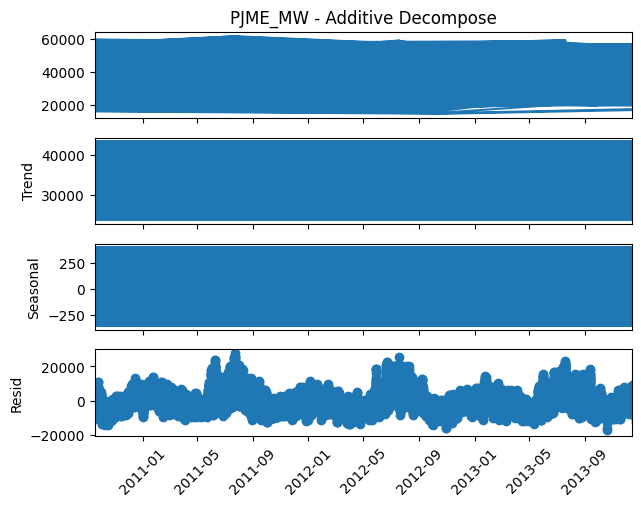

In [76]:
# Plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

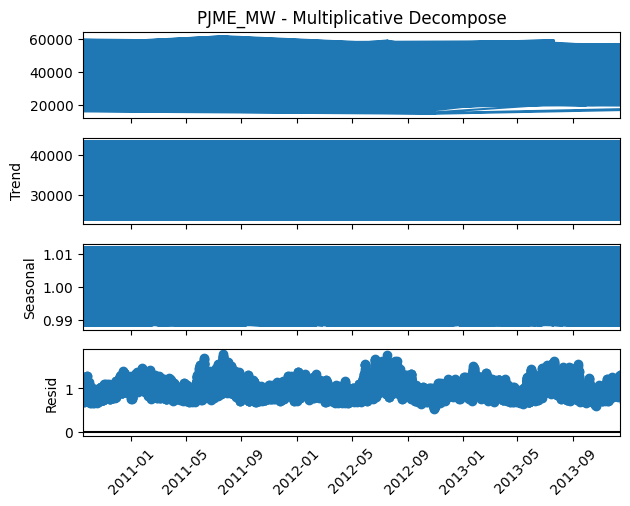

In [77]:
# Plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

In [78]:
print(df_plot['PJME_MW'].describe())

count    145366.000000
mean      32080.222831
std        6464.012166
min       14544.000000
25%       27573.000000
50%       31421.000000
75%       35650.000000
max       62009.000000
Name: PJME_MW, dtype: float64


In [79]:
 # Filtering the data
df_plot = df[df['year'] == 2017].reset_index()
df_plot = df_plot[df_plot['month'] == 5]
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot = df_plot.drop_duplicates(subset = ['Datetime']).sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()


,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,,,,,,,,
2017-05-01 00:00:00,23949.0,2017,5,18,1,0,Mon,2017_5,0,23949.0,23949.0
2017-05-01 01:00:00,22337.0,2017,5,18,1,1,Mon,2017_5,0,22337.0,22337.0
2017-05-01 02:00:00,21369.0,2017,5,18,1,2,Mon,2017_5,0,21369.0,21369.0
2017-05-01 03:00:00,20850.0,2017,5,18,1,3,Mon,2017_5,0,20850.0,20850.0
2017-05-01 04:00:00,20812.0,2017,5,18,1,4,Mon,2017_5,0,20812.0,20812.0


In [80]:
# Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive', period = 24*7)

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model = 'multiplicative', period = 24*7)

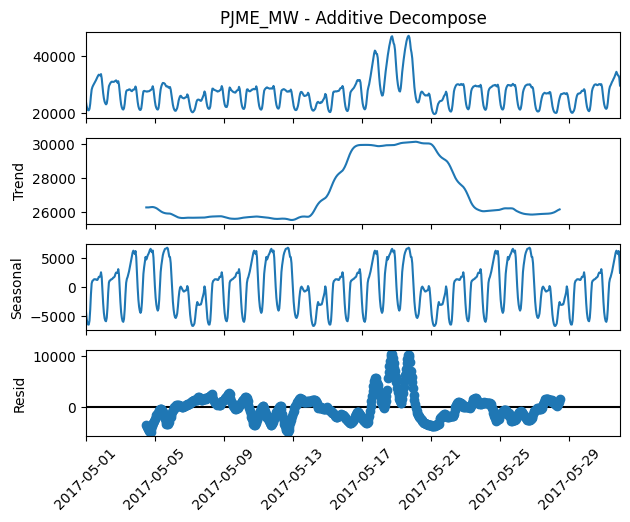

In [81]:
# Plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

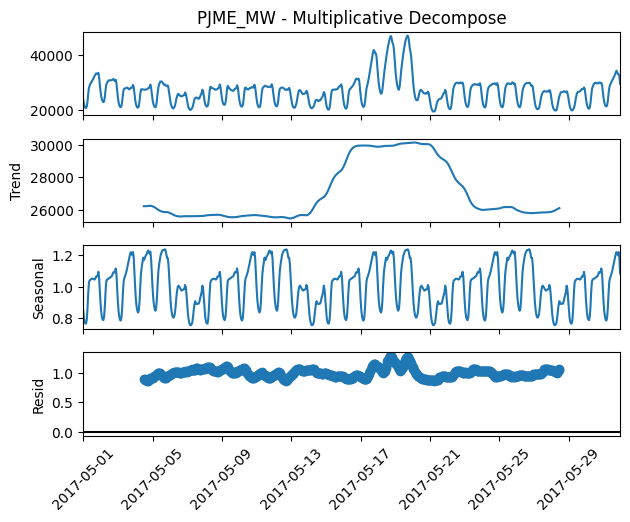

In [82]:
# Plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

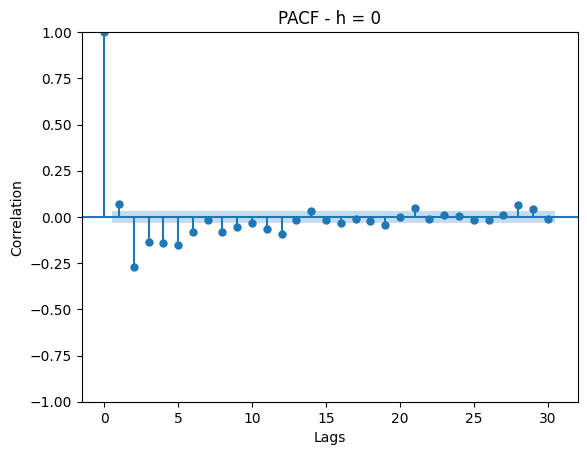

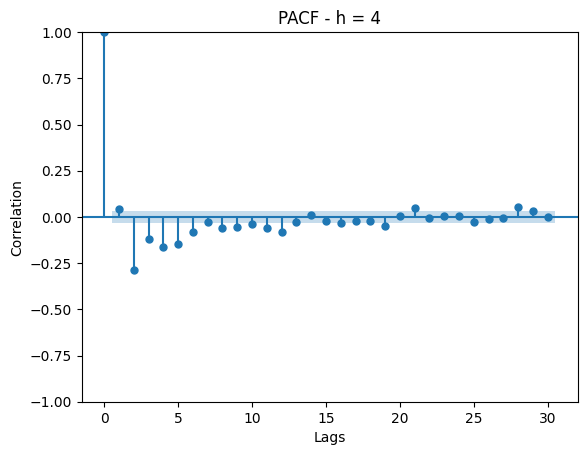

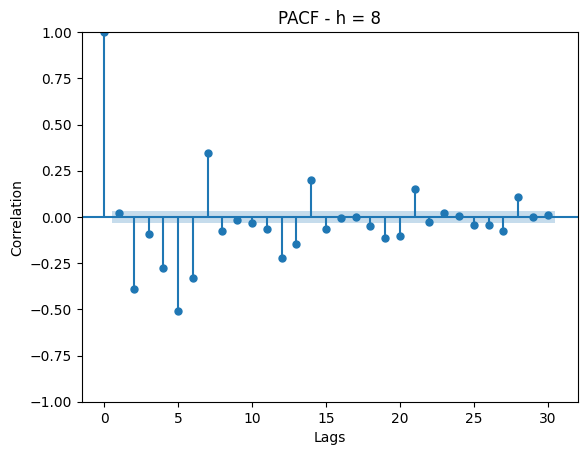

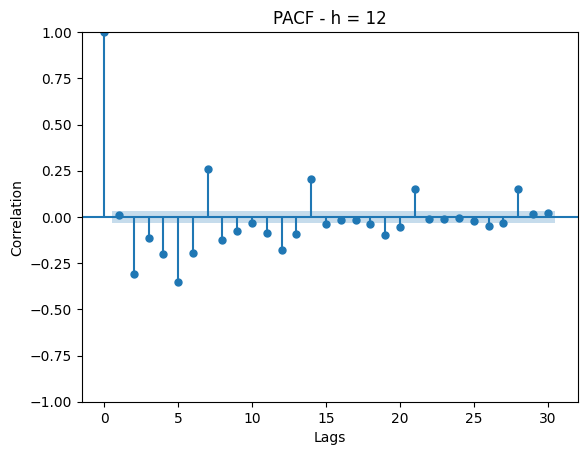

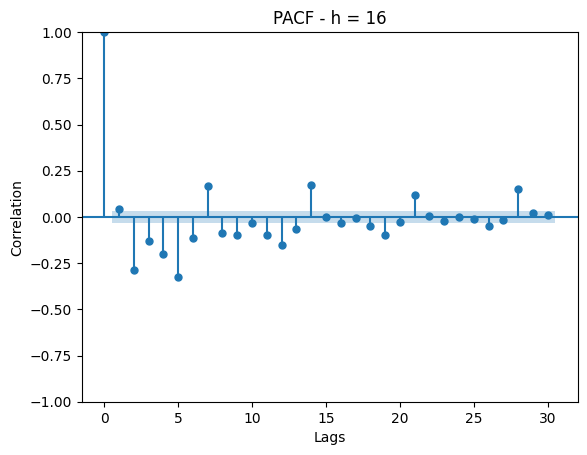

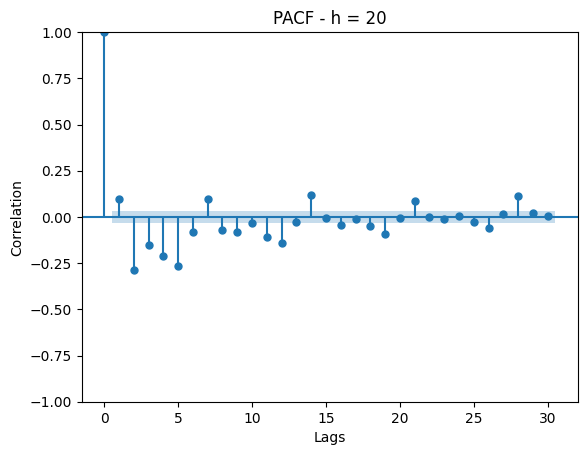

In [83]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf

actual = df['PJME_MW']
hours = range(0, 24, 4)

for hour in hours:
  plot_pacf(actual[actual.index.hour == hour].diff().dropna(), lags = 30, alpha = 0.01)
  plt.title(f'PACF - h = {hour}')
  plt.ylabel('Correlation')
  plt.xlabel('Lags')
  plt.show()